In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
plt.rcParams.update({'font.size': 12})

## Training period
The results of this notebook are further discussed in the report chapter 4.1.

When plotting the actual data, the lines show high fluctuations due to the random factors. Therefore, we chose statistical approaches (line and box plots) to try and find trends in the visualisation.

In [2]:
results_dir = os.getcwd()

In [3]:
result_files = os.listdir(results_dir+'/training')
result_files

['episode_reward_001.csv',
 'episode_reward_002.csv',
 'episode_reward_003.csv',
 'episode_reward_004.csv',
 'episode_reward_005.csv',
 'episode_reward_007.csv',
 'episode_reward_008.csv',
 'episode_reward_009.csv',
 'episode_reward_010.csv',
 'episode_reward_011.csv',
 'episode_reward_012.csv',
 'episode_reward_013.csv',
 'episode_reward_014.csv',
 'episode_reward_015.csv',
 'episode_reward_016.csv',
 'episode_reward_017.csv',
 'episode_reward_018.csv',
 'episode_reward_019.csv',
 'episode_reward_020.csv',
 'episode_reward_021.csv',
 'episode_reward_022.csv',
 'episode_reward_023.csv',
 'episode_reward_024.csv']

In [4]:
results = {}
index = 1
for result_file in result_files:
    results[index] = pd.read_csv(os.path.join(results_dir,'training', result_file))
    index += 1
    # pass corrupted experiment
    if index == 6:
        index += 1

c:\users\anya.heider\appdata\local\continuum\miniconda3\envs\edisgo_env_v2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


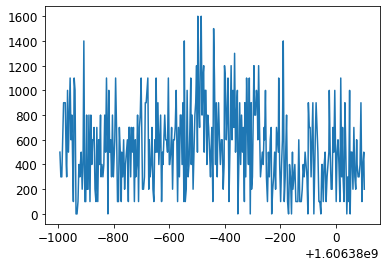

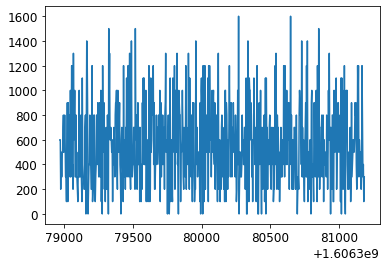

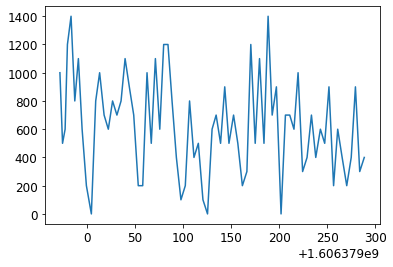

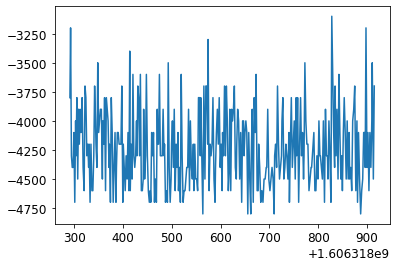

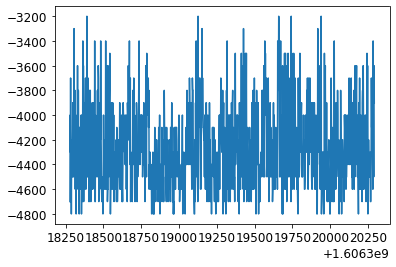

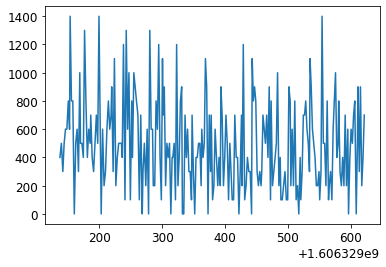

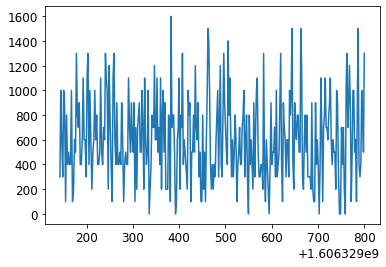

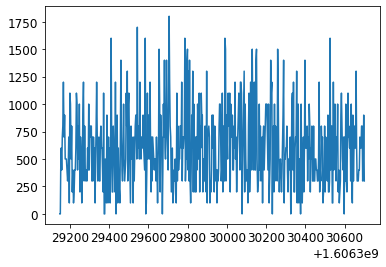

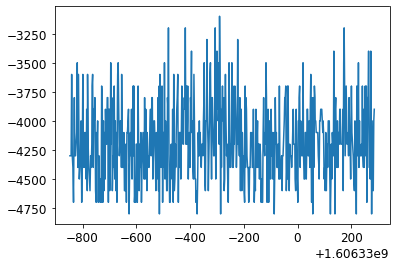

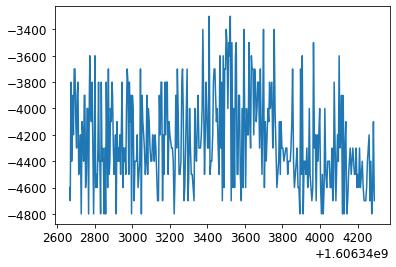

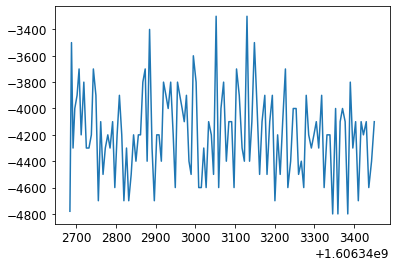

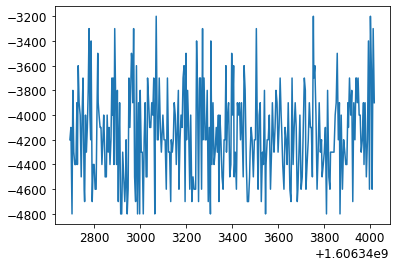

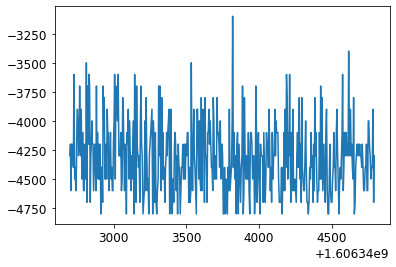

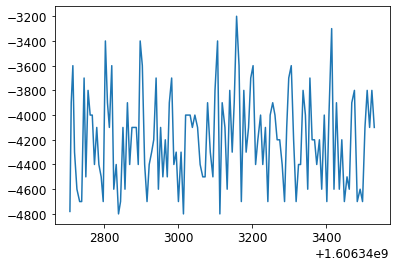

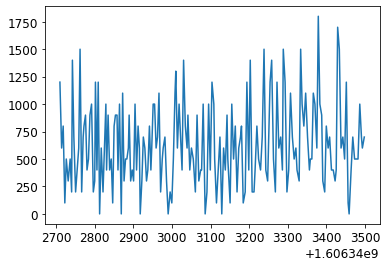

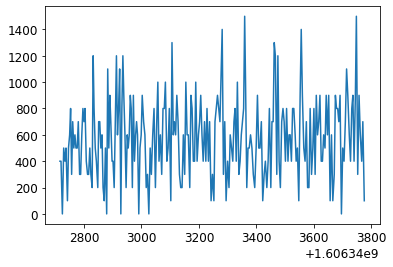

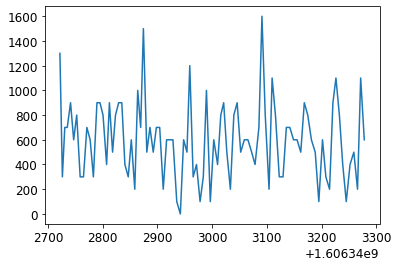

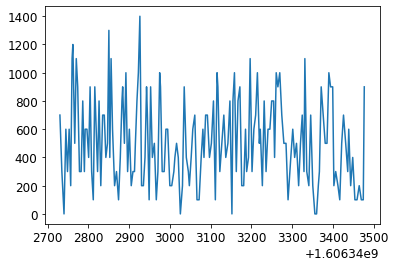

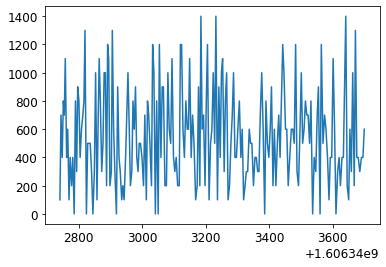

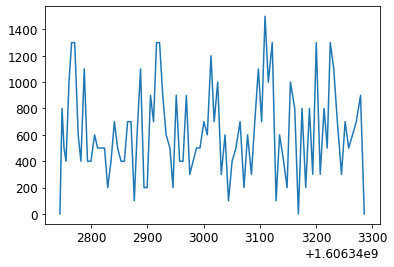

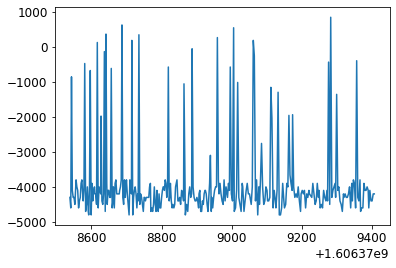

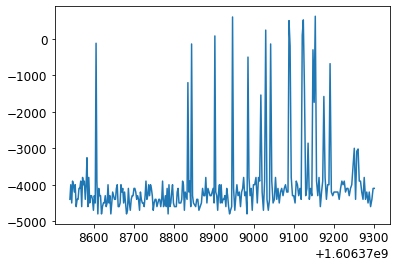

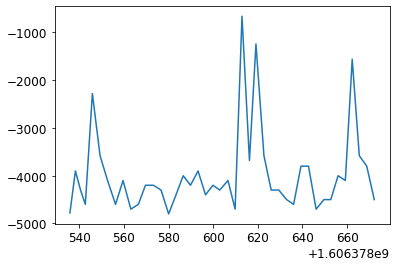

In [5]:
for key, df in results.items():
    plt.figure()
    plt.plot(df['Wall time'], df['Value'])

c:\users\anya.heider\appdata\local\continuum\miniconda3\envs\edisgo_env_v2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


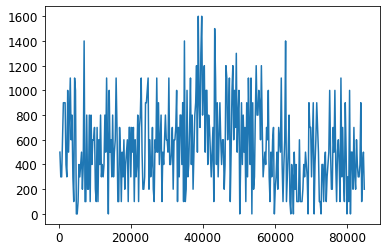

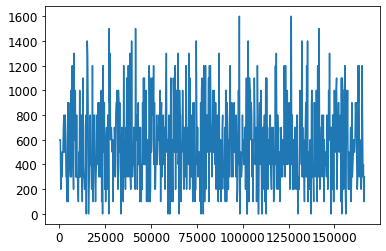

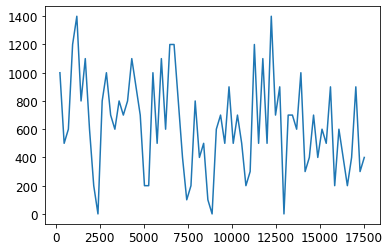

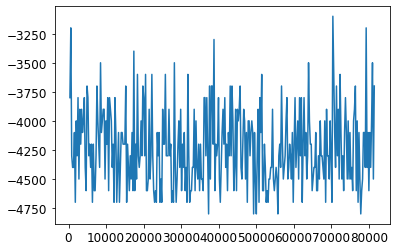

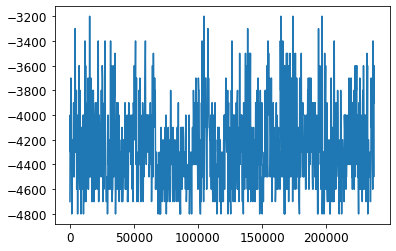

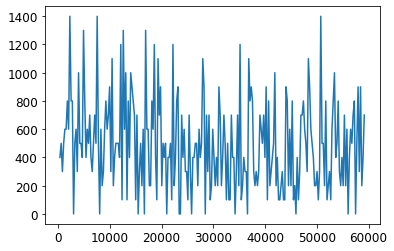

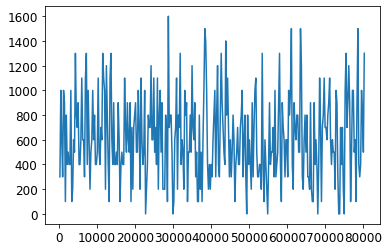

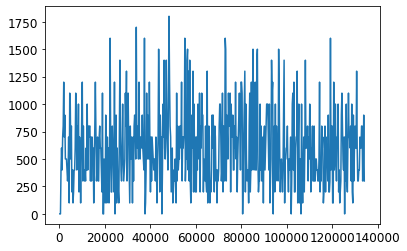

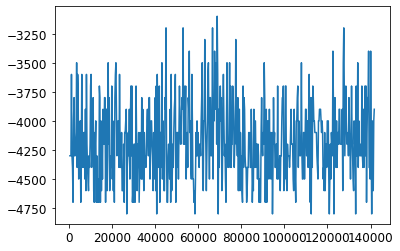

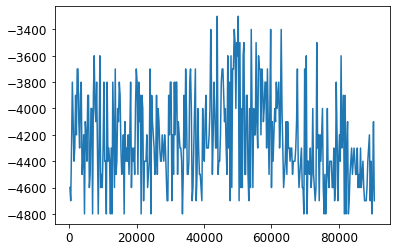

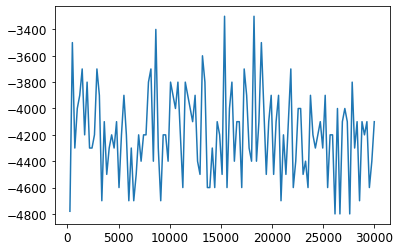

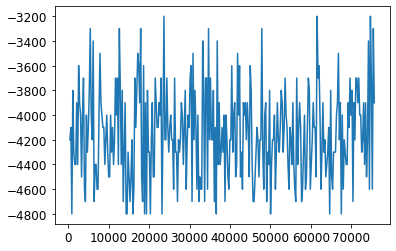

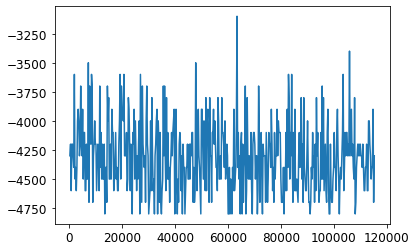

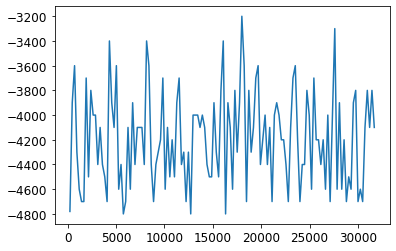

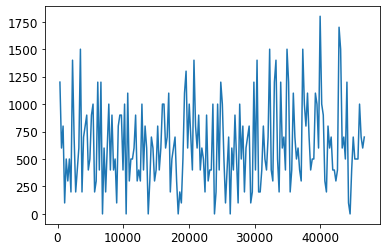

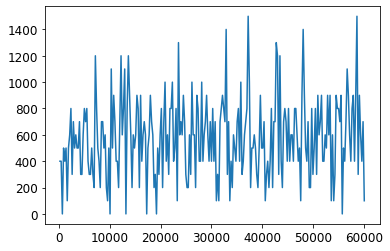

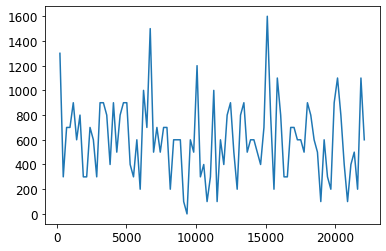

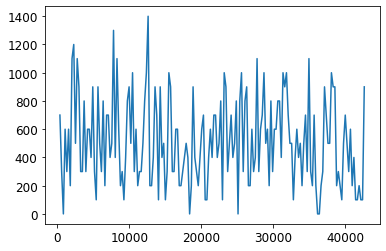

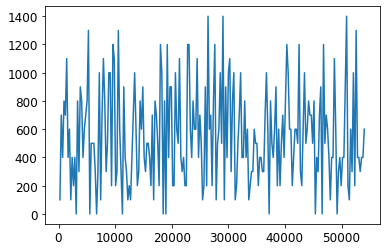

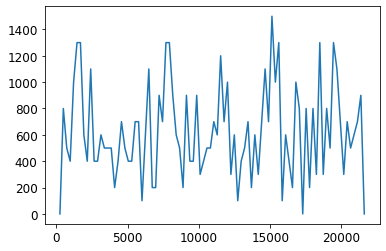

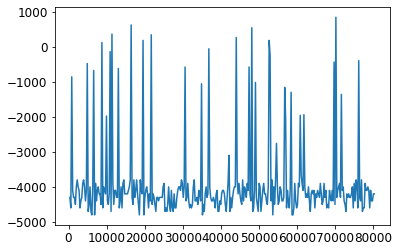

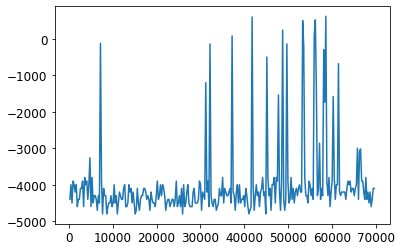

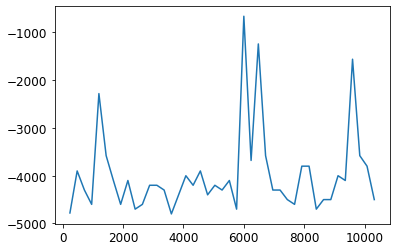

In [6]:
for key, df in results.items():
    plt.figure()
    plt.plot(df['Step'], df['Value'])

In [7]:
experiment_configuration = {}
experiment_configuration[1] = {'algo': 'PPO', 'incentive': 'no'}
experiment_configuration[2] = {'algo': 'A2C', 'incentive': 'no'}
experiment_configuration[3] = {'algo': 'DQN', 'incentive': 'no'}
experiment_configuration[4] = {'algo': 'PPO', 'incentive': 'time'}
experiment_configuration[5] = {'algo': 'A2C', 'incentive': 'time'}
#experiment_configuration[6] = {'algo': 'DQN', 'incentive': 'time'} corrupted
experiment_configuration[7] = {'algo': 'PPO', 'incentive': 'episodic'}
experiment_configuration[8] = {'algo': 'A2C', 'incentive': 'episodic'}
experiment_configuration[9] = {'algo': 'DQN', 'incentive': 'episodic'}
experiment_configuration[10] = {'algo': 'PPO', 'incentive': 'time, episodic'}
experiment_configuration[11] = {'algo': 'A2C', 'incentive': 'time, episodic'}
experiment_configuration[12] = {'algo': 'DQN', 'incentive': 'time, episodic'}
experiment_configuration[13] = {'algo': 'PPO', 'incentive': 'thresholding'}
experiment_configuration[14] = {'algo': 'A2C', 'incentive': 'thresholding'}
experiment_configuration[15] = {'algo': 'DQN', 'incentive': 'thresholding'}
experiment_configuration[16] = {'algo': 'PPO', 'incentive': 'time, thresholding'}
experiment_configuration[17] = {'algo': 'A2C', 'incentive': 'time, thresholding'}
experiment_configuration[18] = {'algo': 'DQN', 'incentive': 'time, thresholding'}
experiment_configuration[19] = {'algo': 'PPO', 'incentive': 'episodic, thresholding'}
experiment_configuration[20] = {'algo': 'A2C', 'incentive': 'episodic, thresholding'}
experiment_configuration[21] = {'algo': 'DQN', 'incentive': 'episodic, thresholding'}
experiment_configuration[22] = {'algo': 'PPO', 'incentive': 'time, episodic, thresholding'}
experiment_configuration[23] = {'algo': 'A2C', 'incentive': 'time, episodic, thresholding'}
experiment_configuration[24] = {'algo': 'DQN', 'incentive': 'time, episodic, thresholding'}

In [8]:
def plot_episode_boxplots(experiment_number, config):
    result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
    result['Episode'] = result['Step']/10000
    result['Episode'] = result['Episode'].apply(int)
    fig = plt.figure()
    ax = sns.boxplot(data=result, x='Episode', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set_title('Development of reward for {},\n {} incentive'.format(config['algo'], config['incentive']))

In [9]:
def plot_episode_lineplot(experiment_number, config, ci=None):
    result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
    result['Episode'] = result['Step']/10000
    result['Episode'] = result['Episode'].apply(int)
    fig = plt.figure()
    ax = sns.lineplot(data=result, x='Episode', y='Reward', ci=ci)
    ax.set_title('Development of reward for {}, {} incentive'.format(config['algo'], config['incentive']))

In [10]:
def plot_episode_lineplot_multi(experiment_numbers):
    results_to_plot = pd.DataFrame()
    for experiment_number in experiment_numbers:
        config = experiment_configuration[experiment_number]
        result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
        result['Episode'] = result['Step']/10000
        result['Episode'] = result['Episode'].apply(int)
        result['Algorithm'] = config['algo']
        results_to_plot = pd.concat([result, results_to_plot])
    fig = plt.figure()
    ax = sns.lineplot(data=results_to_plot, x='Episode', y='Reward', hue='Algorithm')
    ax.set_title('Development of reward for {} incentive'.format(config['incentive']))

### Visualisation using line plots

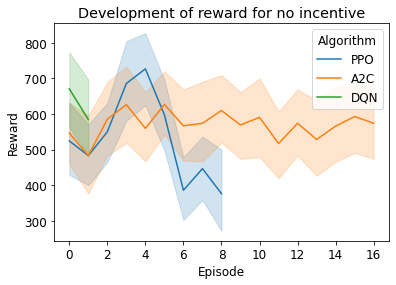

In [11]:
plot_episode_lineplot_multi([3,2,1])

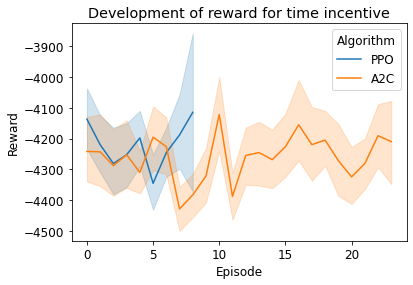

In [12]:
plot_episode_lineplot_multi([5,4])

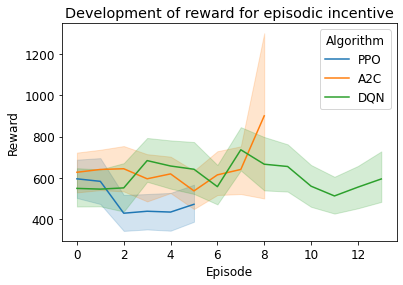

In [13]:
plot_episode_lineplot_multi([9,8,7])

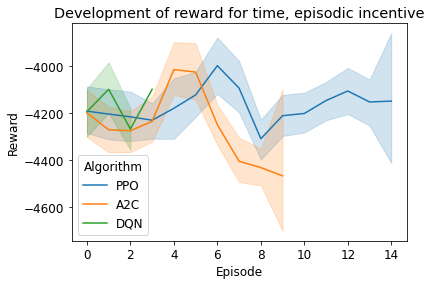

In [14]:
plot_episode_lineplot_multi([12,11,10])

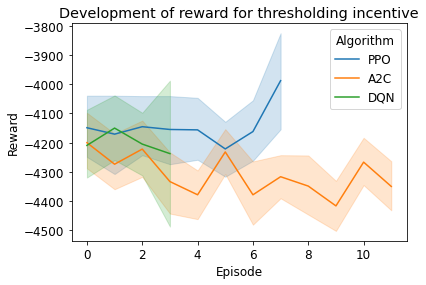

In [15]:
plot_episode_lineplot_multi([15,14,13])

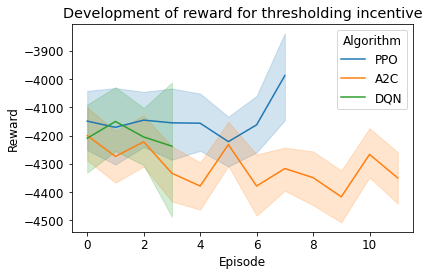

In [16]:
plot_episode_lineplot_multi([15,14,13])
plt.tight_layout()
plt.savefig('reward_development.pdf')

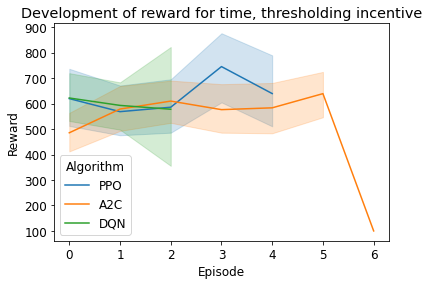

In [17]:
plot_episode_lineplot_multi([18,17,16])

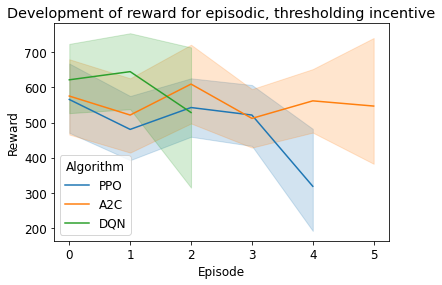

In [18]:
plot_episode_lineplot_multi([21,20,19])

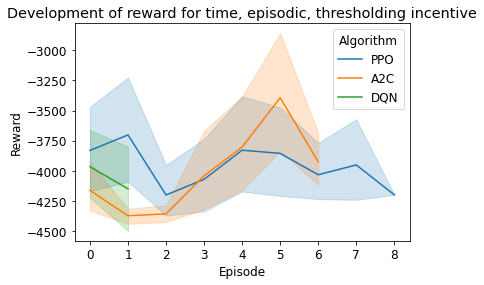

In [19]:
plot_episode_lineplot_multi([24,23,22])

### Visualisation using box plots

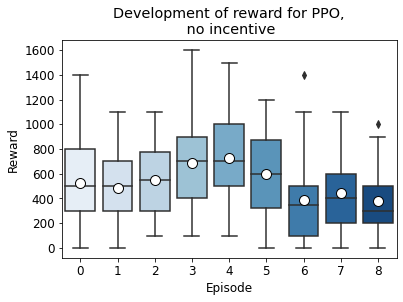

In [20]:
experiment_number = 1
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

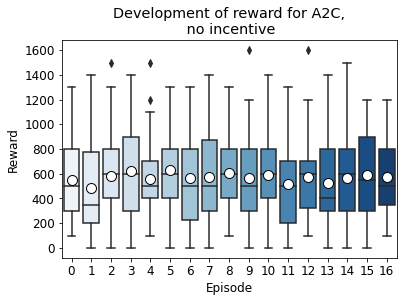

In [21]:
experiment_number = 2
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

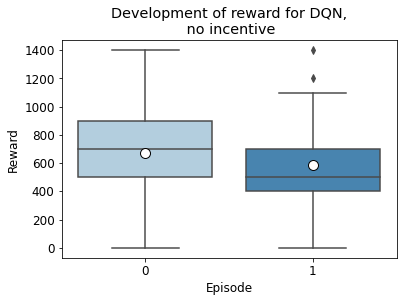

In [22]:
experiment_number = 3
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

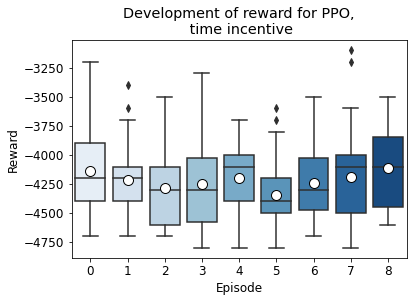

In [23]:
experiment_number = 4
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

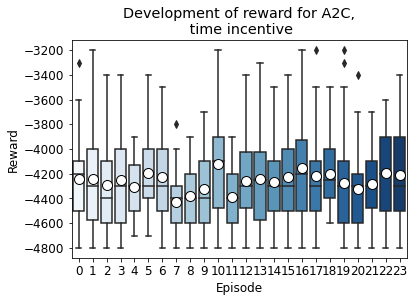

In [24]:
experiment_number = 5
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

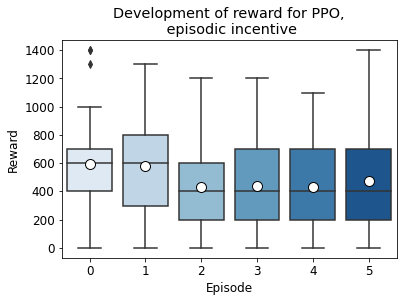

In [25]:
experiment_number = 7
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

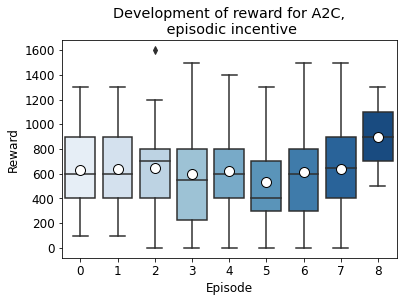

In [26]:
experiment_number = 8
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

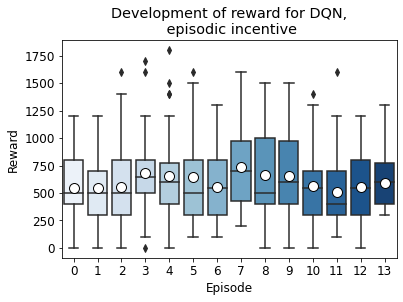

In [27]:
experiment_number = 9
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

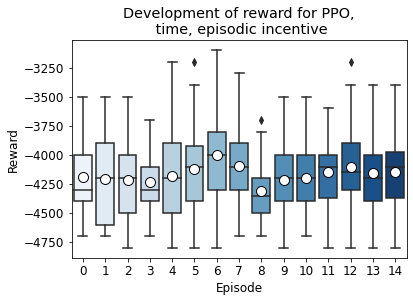

In [28]:
experiment_number = 10
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

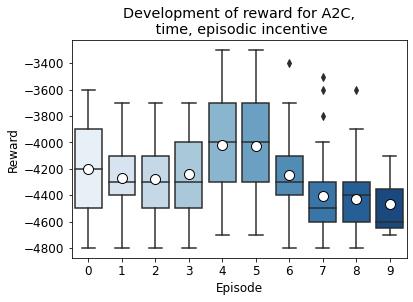

In [29]:
experiment_number = 11
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

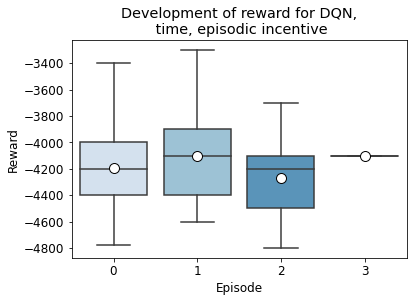

In [30]:
experiment_number = 12
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

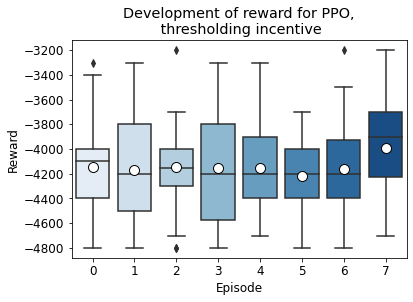

In [31]:
experiment_number = 13
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

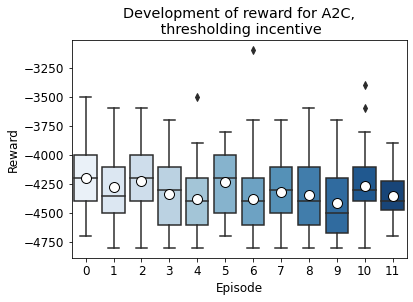

In [32]:
experiment_number = 14
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

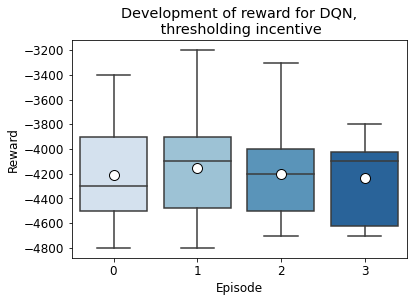

In [33]:
experiment_number = 15
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

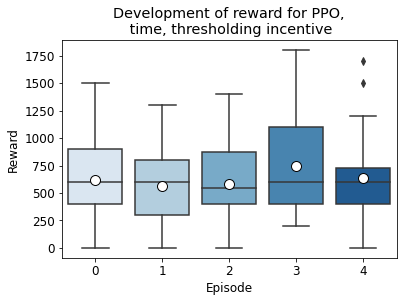

In [34]:
experiment_number = 16
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

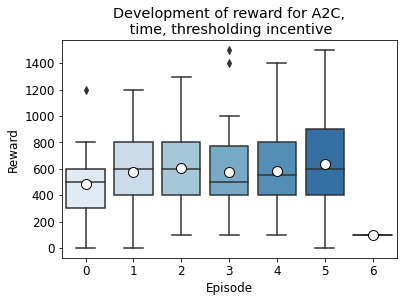

In [35]:
experiment_number = 17
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

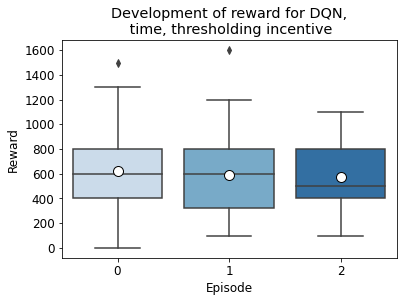

In [36]:
experiment_number = 18
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

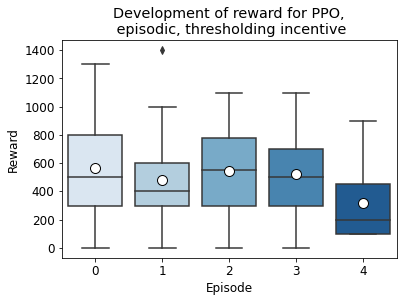

In [37]:
experiment_number = 19
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

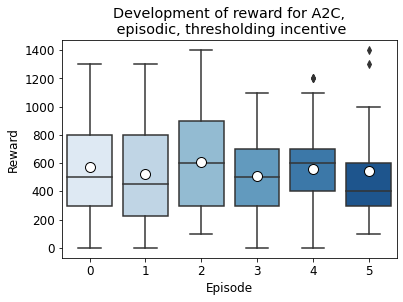

In [38]:
experiment_number = 20
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

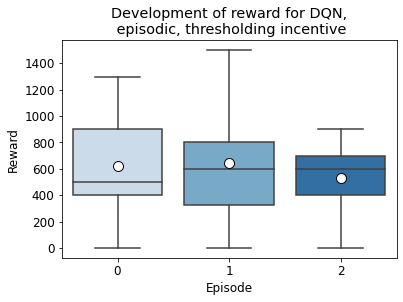

In [39]:
experiment_number = 21
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

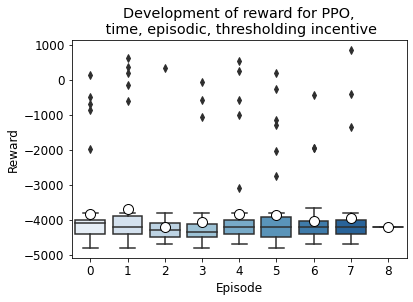

In [40]:
experiment_number = 22
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

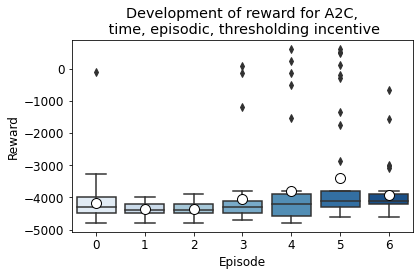

In [41]:
experiment_number = 23
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])
plt.tight_layout()
plt.savefig('reward_development_23.pdf')

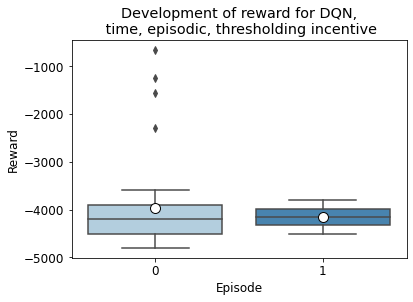

In [42]:
experiment_number = 24
plot_episode_boxplots(experiment_number, experiment_configuration[experiment_number])

In [43]:
time = {}
for key, df in results.items(): 
    time[key] = {'Start': df['Wall time'][0], 'End': df['Wall time'][len(df)-1], 'duration': df['Wall time'][len(df)-1]-df['Wall time'][0]}
    
time

{1: {'Start': 1606379006.6665506,
  'End': 1606380102.1812027,
  'duration': 1095.5146520137787},
 2: {'Start': 1606378968.888316,
  'End': 1606381185.2124915,
  'duration': 2216.324175596237},
 3: {'Start': 1606378972.0091202,
  'End': 1606379288.5380824,
  'duration': 316.52896213531494},
 4: {'Start': 1606318290.684792,
  'End': 1606318915.0373025,
  'duration': 624.3525104522705},
 5: {'Start': 1606318278.720033,
  'End': 1606320291.2645125,
  'duration': 2012.5444796085358},
 7: {'Start': 1606329137.177956,
  'End': 1606329621.5567338,
  'duration': 484.37877774238586},
 8: {'Start': 1606329142.4687812,
  'End': 1606329799.8554986,
  'duration': 657.3867173194885},
 9: {'Start': 1606329149.0089467,
  'End': 1606330700.4278429,
  'duration': 1551.4188961982727},
 10: {'Start': 1606329152.699884,
  'End': 1606330285.5916936,
  'duration': 1132.8918097019196},
 11: {'Start': 1606342668.5321586,
  'End': 1606344288.6021054,
  'duration': 1620.0699467658997},
 12: {'Start': 1606342683.

In [44]:
df['Wall time'][len(df)-1]

1606378672.1643288

## Results end of training

These results are further discussed in the report in the appendix.

In [45]:
def plot_experiments(results_dir, algo, y_lim=None):
    reward_files = os.listdir(results_dir + '/' + algo)
    results = pd.DataFrame()
    # import results
    for file in reward_files:
        str_parts = file.split('_')
        experiment_nr = str_parts[1]
        result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
        result['exp_nr'] = experiment_nr
        results = pd.concat([results, result])
    # get experiment nr
    exp_nrs = [int(nr) for nr in list(results['exp_nr'].unique())]
    list.sort(exp_nrs)
    # create boxplots
    ax = sns.boxplot(data=results, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},   order=[str(nr) for nr in exp_nrs])
    ax.set_title('Reward for {}'.format(algo))
    if y_lim is not None:
        ax.set_ylim(y_lim)
    return ax

### PPO

In [46]:
algo = 'PPO'

In [47]:
reward_files = os.listdir(results_dir + '/' + algo)
reward_files

['experiment_10_PPO_results.csv',
 'experiment_13_PPO_results.csv',
 'experiment_16_PPO_results.csv',
 'experiment_19_PPO_results.csv',
 'experiment_1_PPO_results.csv',
 'experiment_22_PPO_results.csv',
 'experiment_4_PPO_results.csv',
 'experiment_7_PPO_results.csv']

In [48]:
results = {}
for file in reward_files:
    str_parts = file.split('_')
    experiment_nr = str_parts[1]
    results[experiment_nr] = pd.read_csv(os.path.join(results_dir, algo, file))

In [49]:
results = pd.DataFrame()
for file in reward_files:
    str_parts = file.split('_')
    experiment_nr = str_parts[1]
    result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
    result['exp_nr'] = experiment_nr
    results = pd.concat([results, result])
results.head()

,Reward,exp_nr
0,600.0,10
1,800.0,10
2,300.0,10
3,200.0,10
4,400.0,10


In [50]:
general_res = results.groupby(['exp_nr']).min().rename(columns={'Reward':'min'})
general_res['max'] = results.groupby(['exp_nr']).max()
general_res['mean'] = results.groupby(['exp_nr']).mean()
general_res['median'] = results.groupby(['exp_nr']).median()

In [51]:
general_res

,min,max,mean,median
exp_nr,,,,
1,200.0,1800.0,720.0,550.0
10,0.0,800.0,460.0,500.0
13,100.0,1000.0,530.0,550.0
16,100.0,1000.0,580.0,650.0
19,100.0,1500.0,650.0,500.0
22,200.0,1100.0,580.0,500.0
4,100.0,1400.0,600.0,550.0
7,100.0,1200.0,570.0,400.0


In [52]:
exp_nrs = [int(nr) for nr in list(results['exp_nr'].unique())]
list.sort(exp_nrs)
exp_nrs

[1, 4, 7, 10, 13, 16, 19, 22]

Text(0.5, 1.0, 'Reward for PPO')

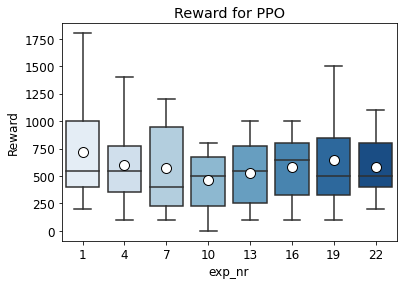

In [53]:
ax = sns.boxplot(data=results, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},   order=[str(nr) for nr in exp_nrs])
ax.set_title('Reward for {}'.format(algo))

In [54]:
list.sort(exp_nrs)
exp_nrs

[1, 4, 7, 10, 13, 16, 19, 22]

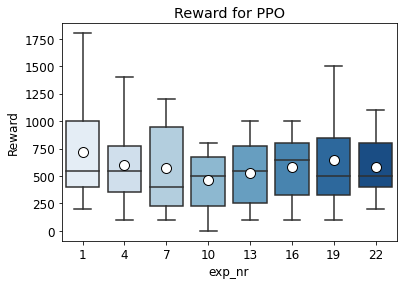

In [55]:
ax_PPO = plot_experiments(results_dir, 'PPO')

### A2C

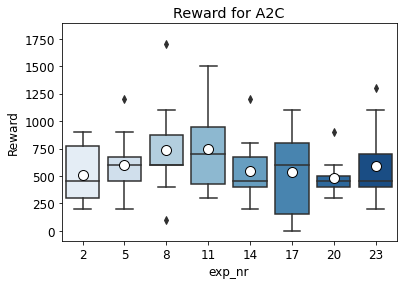

In [56]:
ax_A2C = plot_experiments(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())

In [57]:
algo = 'A2C'
reward_files = os.listdir(results_dir + '/' + algo)
reward_files

['experiment_11_A2C_results.csv',
 'experiment_14_A2C_results.csv',
 'experiment_17_A2C_results.csv',
 'experiment_20_A2C_results.csv',
 'experiment_23_A2C_results.csv',
 'experiment_2_A2C_results.csv',
 'experiment_5_A2C_results.csv',
 'experiment_8_A2C_results.csv']

In [58]:
results = pd.DataFrame()
for file in reward_files:
    str_parts = file.split('_')
    experiment_nr = str_parts[1]
    result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
    result['exp_nr'] = experiment_nr
    results = pd.concat([results, result])
results.head()

,Reward,exp_nr
0,1500.0,11
1,800.0,11
2,1000.0,11
3,600.0,11
4,1200.0,11


In [59]:
general_res = results.groupby(['exp_nr']).min().rename(columns={'Reward':'min'})
general_res['max'] = results.groupby(['exp_nr']).max()
general_res['mean'] = results.groupby(['exp_nr']).mean()
general_res['median'] = results.groupby(['exp_nr']).median()

In [60]:
general_res

,min,max,mean,median
exp_nr,,,,
11,300.0,1500.0,750.0,700.0
14,200.0,1200.0,550.0,450.0
17,0.0,1100.0,540.0,600.0
2,200.0,900.0,510.0,450.0
20,300.0,900.0,480.0,450.0
23,200.0,1300.0,590.0,450.0
5,200.0,1200.0,600.0,600.0
8,100.0,1700.0,740.0,600.0


### DQN

In [61]:
algo = 'DQN'

In [62]:
reward_files = os.listdir(results_dir + '/' + algo)
reward_files

['experiment_12_DQN_results.csv',
 'experiment_15_DQN_results.csv',
 'experiment_18_DQN_results.csv',
 'experiment_21_DQN_results.csv',
 'experiment_24_DQN_results.csv',
 'experiment_3_DQN_results.csv',
 'experiment_6_DQN_results.csv',
 'experiment_9_DQN_results.csv']

In [63]:
results = {}
for file in reward_files:
    str_parts = file.split('_')
    experiment_nr = str_parts[1]
    results[experiment_nr] = pd.read_csv(os.path.join(results_dir, algo, file))

In [64]:
results = pd.DataFrame()
for file in reward_files:
    str_parts = file.split('_')
    experiment_nr = str_parts[1]
    result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
    result['exp_nr'] = experiment_nr
    results = pd.concat([results, result])
results.head()

,Reward,exp_nr
0,400.0,12
1,300.0,12
2,900.0,12
3,100.0,12
4,200.0,12


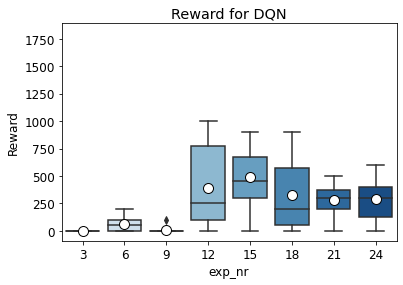

In [65]:
ax_DQN=plot_experiments(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())

In [66]:
plt.savefig('reward_comparison.pdf')

<Figure size 432x288 with 0 Axes>

In [67]:
general_res = results.groupby(['exp_nr']).min().rename(columns={'Reward':'min'})
general_res['max'] = results.groupby(['exp_nr']).max()
general_res['mean'] = results.groupby(['exp_nr']).mean()
general_res['median'] = results.groupby(['exp_nr']).median()

In [68]:
general_res

,min,max,mean,median
exp_nr,,,,
12,0.0,1000.0,390.0,250.0
15,0.0,900.0,490.0,450.0
18,0.0,900.0,330.0,200.0
21,0.0,500.0,280.0,300.0
24,0.0,600.0,290.0,300.0
3,0.0,0.0,0.0,0.0
6,0.0,200.0,60.0,50.0
9,0.0,100.0,10.0,0.0


# Overall results

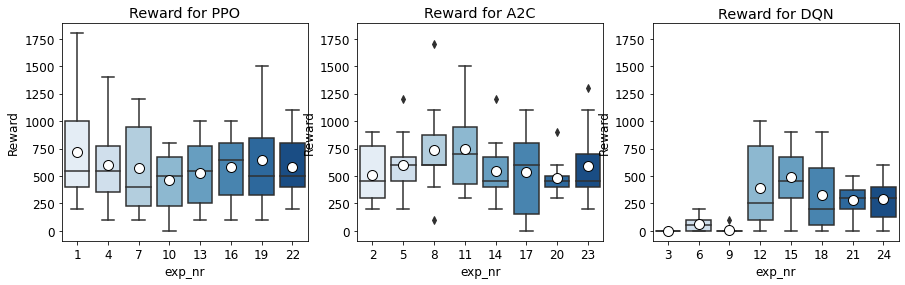

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(131)
ax_PPO = plot_experiments(results_dir, 'PPO')
plt.subplot(132)
ax_A2C = plot_experiments(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())
plt.subplot(133)
ax_DQN=plot_experiments(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())
plt.savefig('reward_comparison.pdf')

In [70]:
def plot_rewards(results_dir, algo, y_lim=None):
    reward_files = os.listdir(results_dir + '/' + algo)
    results = pd.DataFrame()
    # import results
    for file in reward_files:
        str_parts = file.split('_')
        experiment_nr = str_parts[1]
        result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
        result['exp_nr'] = experiment_nr
        results = pd.concat([results, result])
    # get experiment nr
    exp_nrs = [int(nr) for nr in list(results['exp_nr'].unique())]
    list.sort(exp_nrs)
    # create boxplots
    ax = sns.boxplot(data=results, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},   order=[str(nr) for nr in exp_nrs])
    ax.set_title('{}'.format(algo))
    
    if y_lim is not None:
        ax.set_ylim(y_lim)
        ax.axes.yaxis.set_visible(False)
    return ax

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


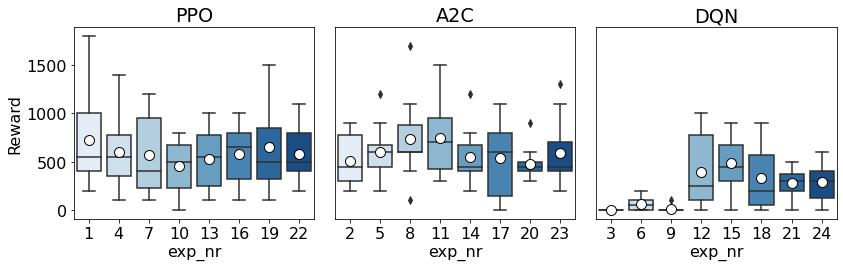

In [71]:
from matplotlib import rc
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
plt.axes(ax1)
ax_PPO = plot_rewards(results_dir, 'PPO')
plt.axes(ax2)
ax_A2C = plot_rewards(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())
plt.axes(ax3)
ax_DQN=plot_rewards(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())
plt.tight_layout()
plt.savefig('mineral_comparison_v3.pdf')